# Step 1: Read the data, perform primary analysis and data cleanup
## Download the data from sklearn and study their structure. For this:

- Let's look at the general information about the data.
- Let's check for missing values.
- Let's study the target feature (malignant or benign tumor).

# Description of the dataset
The Breast Cancer Wisconsin dataset from the Scikit-learn library is designed for binary classification tasks. It contains information on 569 tumor samples, each of which is described by 30 numerical signs related to the histological characteristics of cell nuclei. The target variable indicates the type of tumor: 0 indicates benign, and 1 indicates malignant.
This dataset is widely used for training and testing machine learning algorithms, allowing you to explore classification methods and evaluate their effectiveness on real medical data

In [141]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
from IPython.display import display
import time


data = load_breast_cancer()

df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

display(df.head())
display(df.info())
display(df.isnull().sum())
display(df['target'].value_counts())


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

None

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

target
1    357
0    212
Name: count, dtype: int64

# Step 2: Exploratory Data Analysis (EDA)
## We will do it:

- Visualization of the class distribution.
- Building distributions for several key features.
- Feature correlation analysis.

C:\Users\denis\AppData\Local\Temp\ipykernel_22304\3327515221.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='Set2')


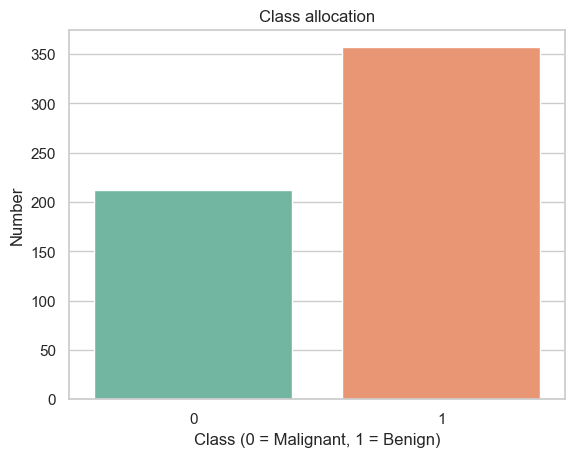

In [142]:
sns.countplot(x='target', data=df, palette='Set2')
plt.title("Class allocation")
plt.xlabel("Class (0 = Malignant, 1 = Benign)")
plt.ylabel("Number")
plt.show()

## There is a slight class imbalance in the target feature:
- Class 1 (benign tumor) is more common than class 0 (malignant tumor).
However, the imbalance is not critical, and the basic models will be able to cope with it without using special balancing methods.
---

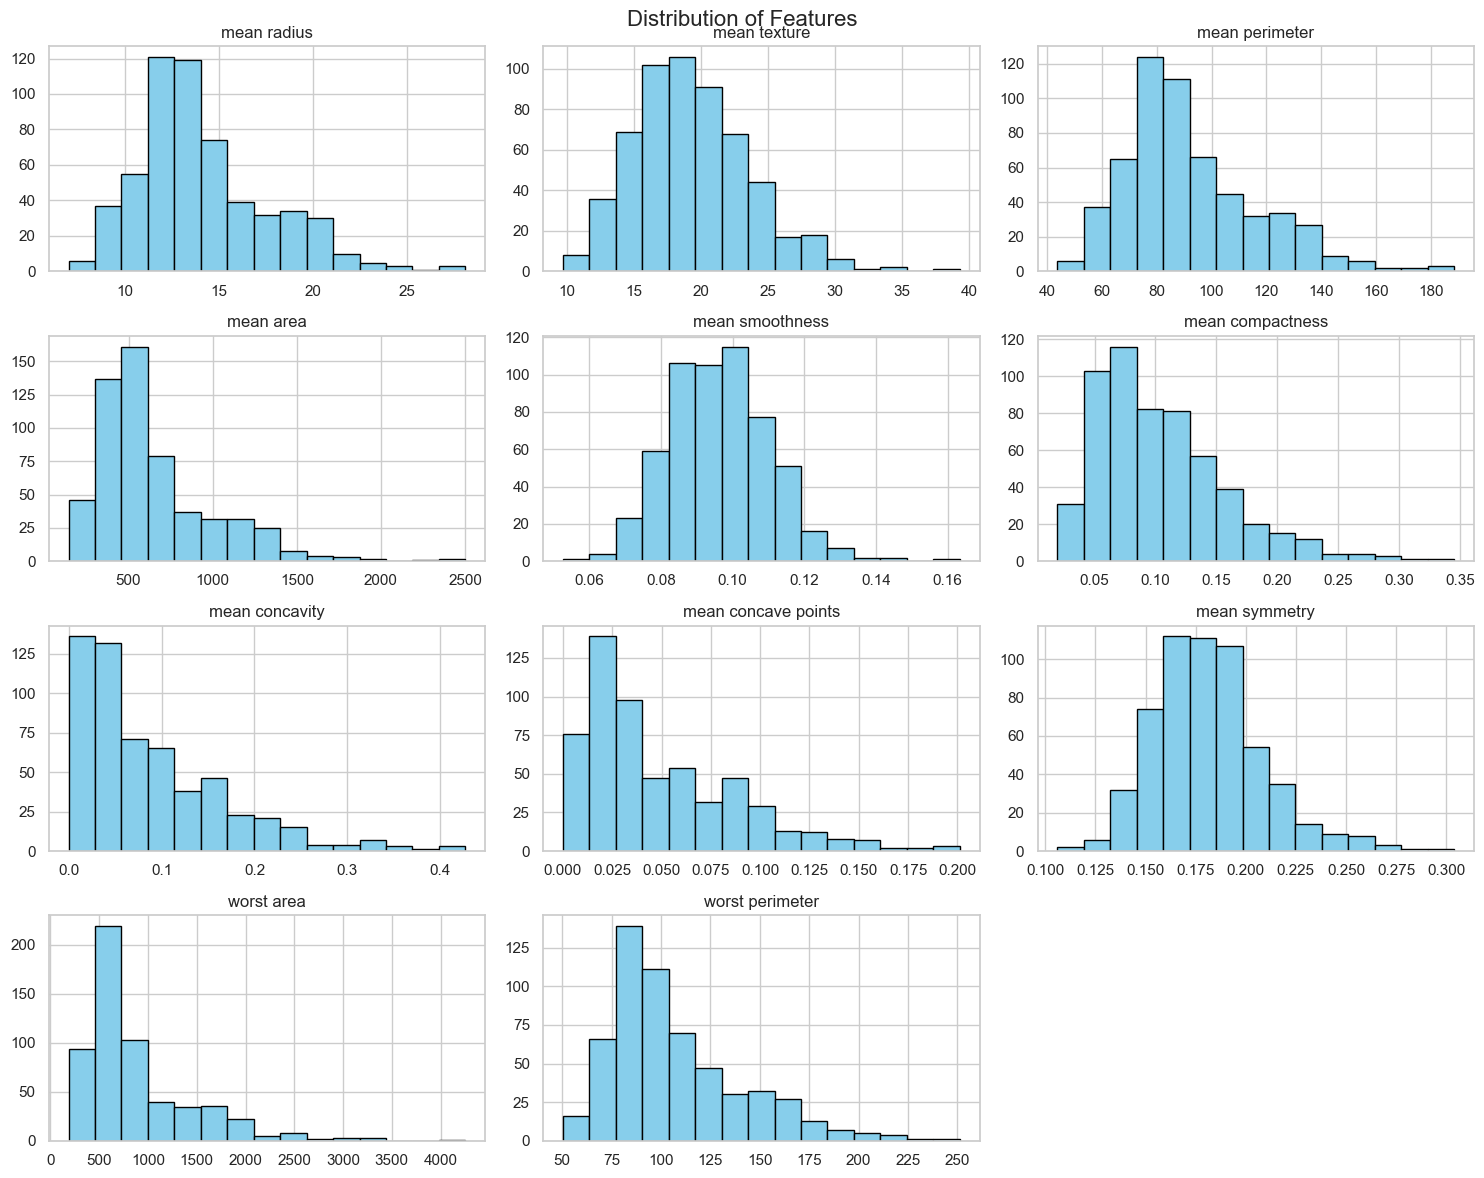

In [143]:
features_to_plot = [
    'mean radius', 
    'mean texture', 
    'mean perimeter', 
    'mean area',
    'mean smoothness', 
    'mean compactness', 
    'mean concavity', 
    'mean concave points', 
    'mean symmetry', 
    'worst area', 
    'worst perimeter'
]

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 12))
axes = axes.flatten()

for i, feature in enumerate(features_to_plot):
    df[feature].hist(bins=15, ax=axes[i], color='skyblue', edgecolor='black')
    axes[i].set_title(feature)

if len(features_to_plot) < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.suptitle("Distribution of Features", fontsize=16)
plt.subplots_adjust(top=0.95)
plt.show()

### Report on the distribution of indicators (breast cancer)

**Description:**  
12 indicators reflecting the size (radius, area, perimeter) and structural characteristics of tumors (smoothness, compactness, symmetry) were selected. These parameters are important for analyzing the nature of the tumor (benign or malignant).  

**Brief conclusions:**  
1. **Mean radius, perimeter, area:** Most tumors are small in size. Outliers indicate larger and possibly aggressive tumors.  
2. **Mean texture:** The main values are in the range of 10-25, which indicates the similarity of textures.  
3. **Mean smoothness, compactness, symmetry:** Narrow ranges of values indicate limited variability of these characteristics.
4. **Mean concavity, concave points:** Most tumors have low concavity, high values are less common and may be malignant.  
5. **Worst area, perimeter:** Significant variability, emissions signal possible aggressiveness.  

---

**General conclusion:**  
Most tumors have similar characteristics, but outliers in size and concavity can be indicators of malignant cases. The parameters are suitable for classifying tumors, which can be used to build machine learning models.

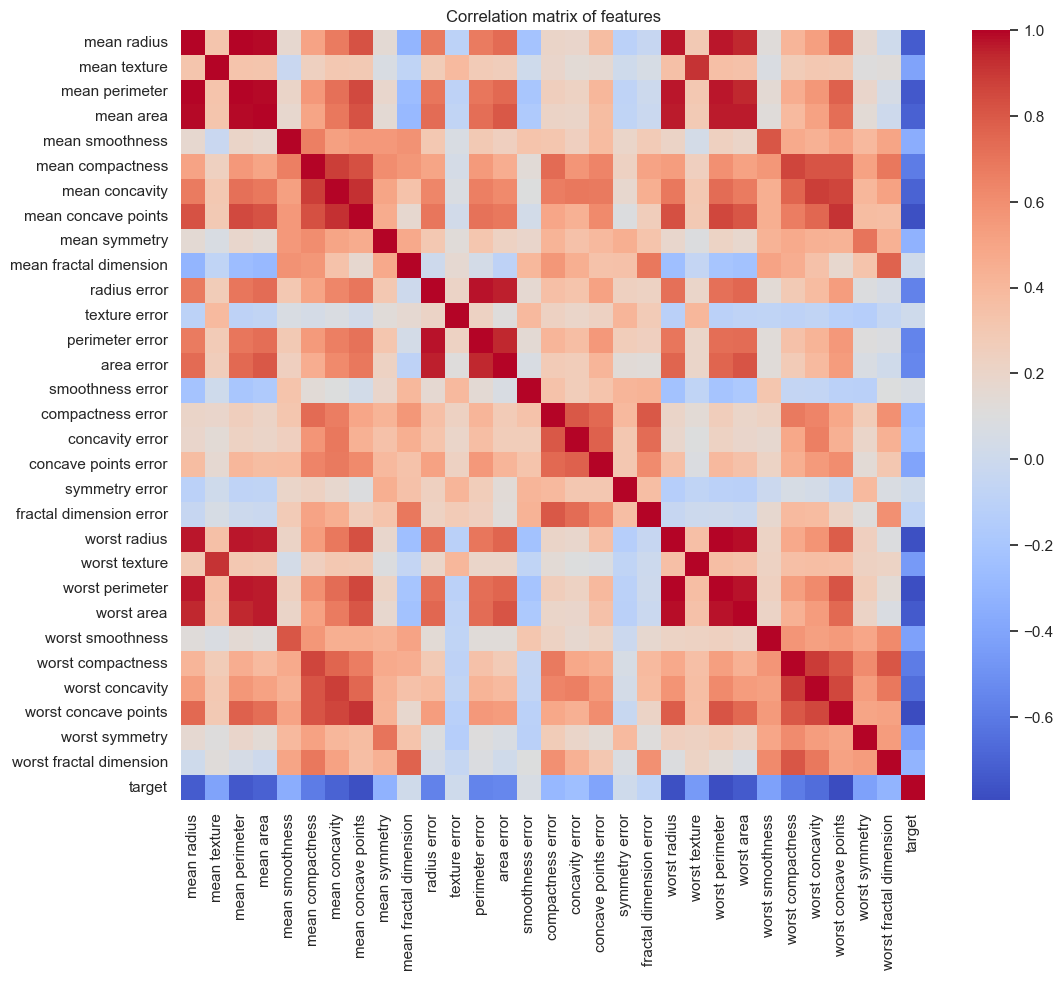

In [144]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False, fmt=".2f")
plt.title("Correlation matrix of features")
plt.show()

# Correlation of features:

- Some features are strongly correlated with each other (for example, mean radius, mean perimeter and mean area have a high mutual correlation).
This indicates the potential redundancy of the data, which can be taken into account when using dimensionality reduction methods such as PCA (Principal Component Analysis).

# Step 3: Data Transformation and Processing (Feature Engineering)
## We will do:

- Identify and remove highly correlated features
- Prepare features and target variable after dropping correlated features
- Building correlation matrix after feature removal
- Normalize the features


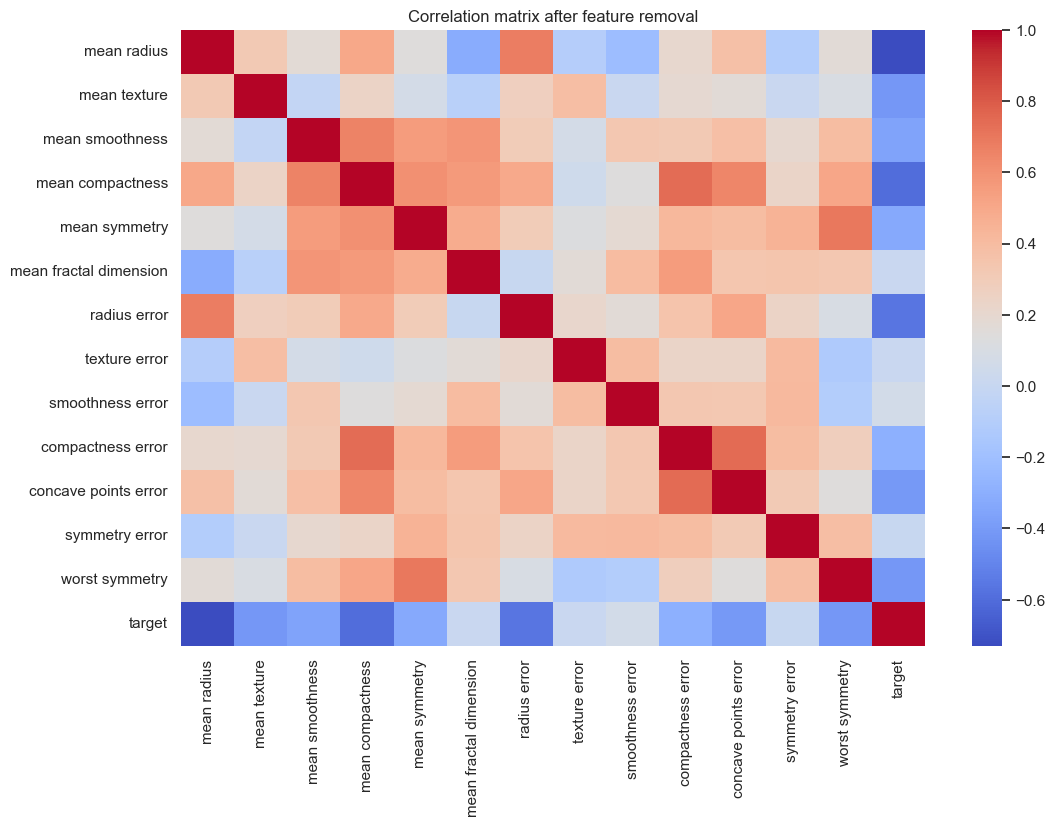

In [ ]:
correlation_matrix = df.corr()
threshold = 0.8
to_drop = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            to_drop.add(colname)

df_reduced = df.drop(columns=to_drop)

plt.figure(figsize=(12, 8))
plt.title('Correlation matrix after feature removal')
correlation_matrix_after = df_reduced.corr()
sns.heatmap(correlation_matrix_after, cmap="coolwarm", annot=False, fmt=".2f")
plt.show()

X = df_reduced.drop('target', axis=1)
y = df_reduced['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:

X = df_reduced.drop('target', axis=1)
y = df_reduced['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 4: Selection of hyperparameters, training of models and comparison of results
## We will train 4 classifiers:

- Logistic regression.
- The nearest neighbor method.
- Random forest.
- The method of support vectors.
We use cross-validation to evaluate the quality of the models. Then we will build a confusion matrix for each model.

## Let's define the models that we will compare

In [146]:
models = {
    "Logistic Regression": {
        "model": LogisticRegression(),
        "params": {
            'C': [0.01, 0.1, 1, 10, 100],
            'solver': ['liblinear']
        }
    },
    "K-Nearest Neighbors": {
        "model": KNeighborsClassifier(),
        "params": {
            'n_neighbors': [3, 5, 7, 9],
            'weights': ['uniform', 'distance']
        }
    },
    "Random Forest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20, 30]
        }
    },
    "Support Vector Machine": {
        "model": SVC(),
        "params": {
            'C': [0.01, 0.1, 1, 10],
            'kernel': ['linear', 'rbf']
        }
    }
}


## Dictionary for storing results

In [147]:

results = {
    'Model': [],
    'Accuracy': [],
    'Training Time (s)': [],
    'Prediction Time (ms)': []
}

## A function for evaluating a model with cross-validation and selection of hyperparameters

--- LogisticRegression ---
   Accuracy
0  0.929825
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        64
           1       0.94      0.94      0.94       107

    accuracy                           0.93       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.93      0.93      0.93       171



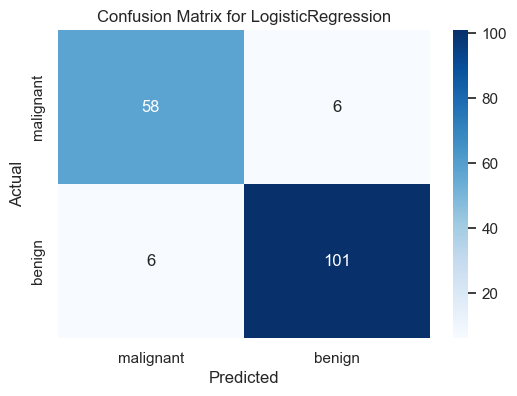

--- KNeighborsClassifier ---
   Accuracy
0  0.923977
              precision    recall  f1-score   support

           0       0.92      0.88      0.90        64
           1       0.93      0.95      0.94       107

    accuracy                           0.92       171
   macro avg       0.92      0.91      0.92       171
weighted avg       0.92      0.92      0.92       171



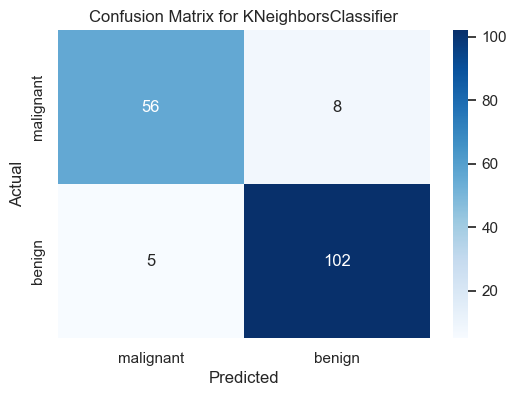

--- RandomForestClassifier ---
   Accuracy
0  0.923977
              precision    recall  f1-score   support

           0       0.89      0.91      0.90        64
           1       0.94      0.93      0.94       107

    accuracy                           0.92       171
   macro avg       0.92      0.92      0.92       171
weighted avg       0.92      0.92      0.92       171



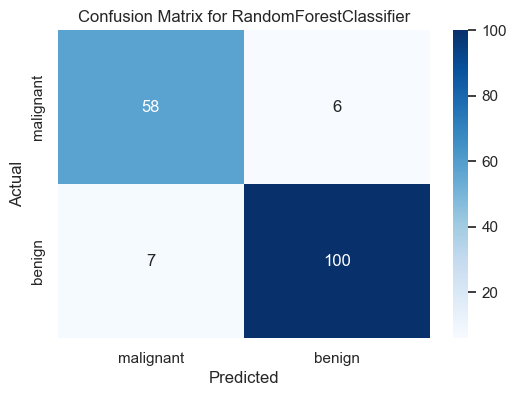

--- SVC ---
   Accuracy
0  0.935673
              precision    recall  f1-score   support

           0       0.92      0.91      0.91        64
           1       0.94      0.95      0.95       107

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



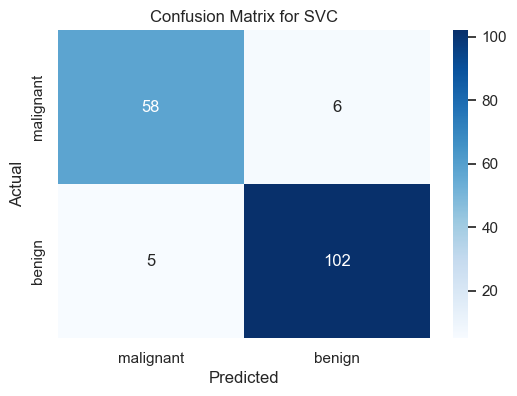

In [148]:

def evaluate_model(model_info, X_train, y_train, X_test, y_test):
    model = model_info['model']
    params = model_info['params']
    
    grid_search = GridSearchCV(model, params, cv=5)
    
    start_time = time.time()
    grid_search.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    best_model = grid_search.best_estimator_
    
    start_time = time.time()
    y_pred = best_model.predict(X_test)
    prediction_time = (time.time() - start_time) * 1000  
    
    accuracy = accuracy_score(y_test, y_pred)
    
    results['Model'].append(type(best_model).__name__)
    results['Accuracy'].append(accuracy)
    results['Training Time (s)'].append(training_time)
    results['Prediction Time (ms)'].append(prediction_time)

    print(f"--- {type(best_model).__name__} ---")
    
    print(pd.DataFrame({'Accuracy': [accuracy]}))
    
    print(classification_report(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=data.target_names,
                yticklabels=data.target_names)
    
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix for {type(best_model).__name__}")
    plt.show()

for name, model_info in models.items():
    evaluate_model(model_info, X_train, y_train, X_test, y_test)

### Report on the results of models for predicting breast cancer

**The data provides a comparative analysis of the operation of four classification models:**  
1. Logistic Regression  
2. K-Neighbors Classifier  
3. Random Forest Classifier  
4. Support Vector Classifier (SVC)

---



### 1. **Logistic Regression**  
- **Accuracy:** 0.9298  
- **Classes:**  
  - **Class 0:**  
    - Precision: 0.91  
    - Recall: 0.91  
    - F1-Score: 0.91  
  - **Class 1:**  
    - Precision: 0.94  
    - Recall: 0.94  
    - F1-Score: 0.94  
- **Average metrics:**  
  - Macro Average: 0.93  
  - Weighted Average: 0.93  
- **Conclusion:**  
The Logistic Regression model showed good accuracy and balanced prediction quality for both classes. She is able to confidently separate classes, although the accuracy is slightly inferior to more complex models.

---



### 2. **K-Neighbors Classifier**  
- **Accuracy:** 0.9240  
- **Classes:**  
  - **Class 0:**  
    - Precision: 0.92  
    - Recall: 0.88  
    - F1-Score: 0.90  
  - **Class 1:**  
    - Precision: 0.93  
    - Recall: 0.95  
    - F1-Score: 0.94  
- **Average metrics:**  
  - Macro Average: 0.92  
  - Weighted Average: 0.92  
- **Conclusion:**  
The K-Neighbors Classifier demonstrates accuracy similar to Logistic Regression. However, the metrics for class 0 (especially Recall) are slightly lower, which may mean that the model defines one of the classes worse.

---



### 3. **Random Forest Classifier**  
- **Accuracy:** 0.9240  
- **Classes:**  
  - **Class 0:**  
    - Precision: 0.89  
    - Recall: 0.91  
    - F1-Score: 0.90  
  - **Class 1:**  
    - Precision: 0.94  
    - Recall: 0.93  
    - F1-Score: 0.94  
- **Average metrics:**  
  - Macro Average: 0.92  
  - Weighted Average: 0.92  
- **Conclusion:**  
The Random Forest Classifier demonstrates accuracy and F1 measures similar to K-Neighbors. However, the Precision for class 0 is lower, which can lead to more frequent false alarms for this class.

---



### 4. **Support Vector Classifier (SVC)**  
- **Accuracy:** 0.9357  
- **Classes:**  
  - **Class 0:**  
    - Precision: 0.92  
    - Recall: 0.91  
    - F1-Score: 0.91  
  - **Class 1:**  
    - Precision: 0.94  
    - Recall: 0.95  
    - F1-Score: 0.95  
- **Average metrics:**  
  - Macro Average: 0.93  
  - Weighted Average: 0.94  
- **Conclusion:**  
The SVC showed the highest accuracy among all models. The Precision and Recall metrics for both classes are also higher, which makes this model the most preferable for the task of classifying breast cancer.

---



### General conclusion
The most suitable model is the Support Vector Classifier (SVC), due to the high Recall and F1 measure for Class 1. This ensures that missed cases are minimized while maintaining Precision balance.

# Graph of model accuracy

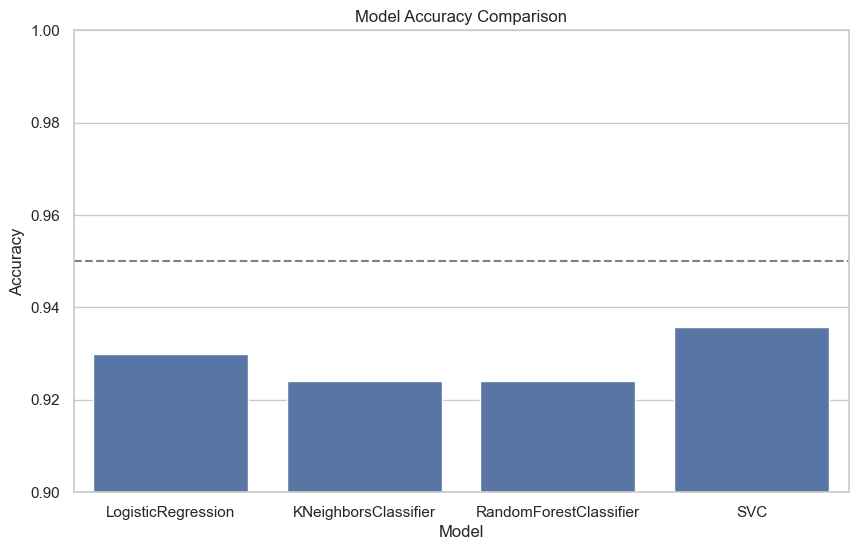

In [149]:
results_df = pd.DataFrame(results)

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=results_df)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0.9, 1.0)
plt.axhline(y=0.95, color='gray', linestyle='--')
plt.show()


This graph shows that LinearRegression showed the best accuracy, and Random Forest classifier showed the worst

# Graph model Training Time Comparison

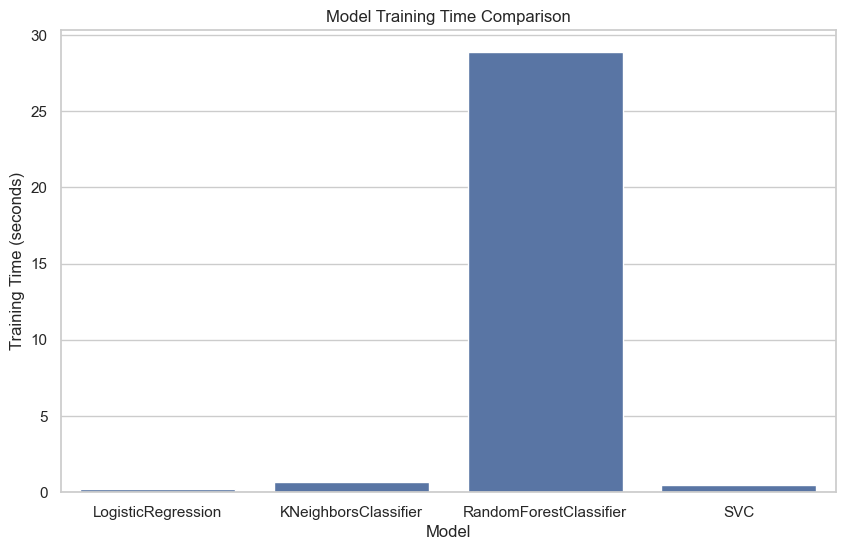

In [150]:

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Training Time (s)', data=results_df)
plt.ylabel('Training Time (seconds)')
plt.title('Model Training Time Comparison')
plt.show()


This graph shows that the random forest model trains much longer than the other models by several times, and the fastest model is the one that trains the least in time, LogisticRegression

# Graph model Prediction Time Comparison

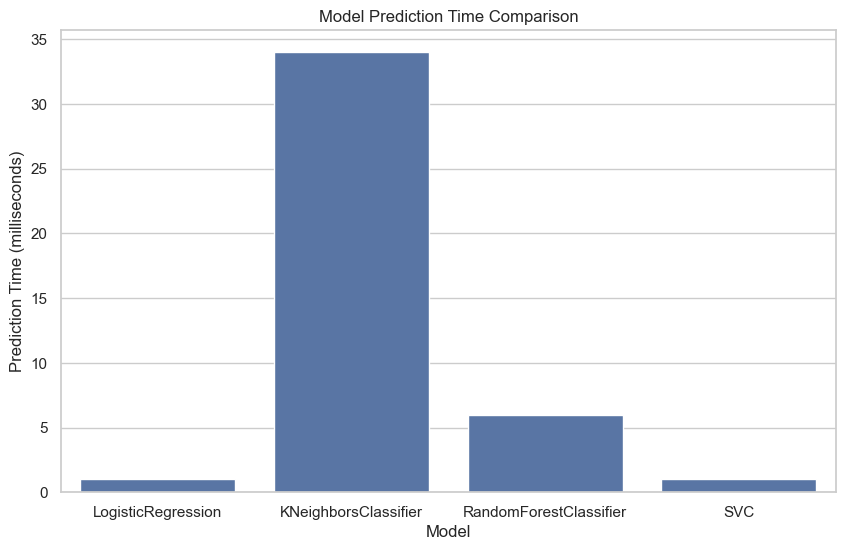

In [151]:

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Prediction Time (ms)', data=results_df)
plt.ylabel('Prediction Time (milliseconds)')
plt.title('Model Prediction Time Comparison')
plt.show()